## 5-1 FeedForward:

as in the book, we consider a neural networks that contruct of of an input layer with $D$-dimensional input layer and two hhiden layer and one output layer with two units(neurons).



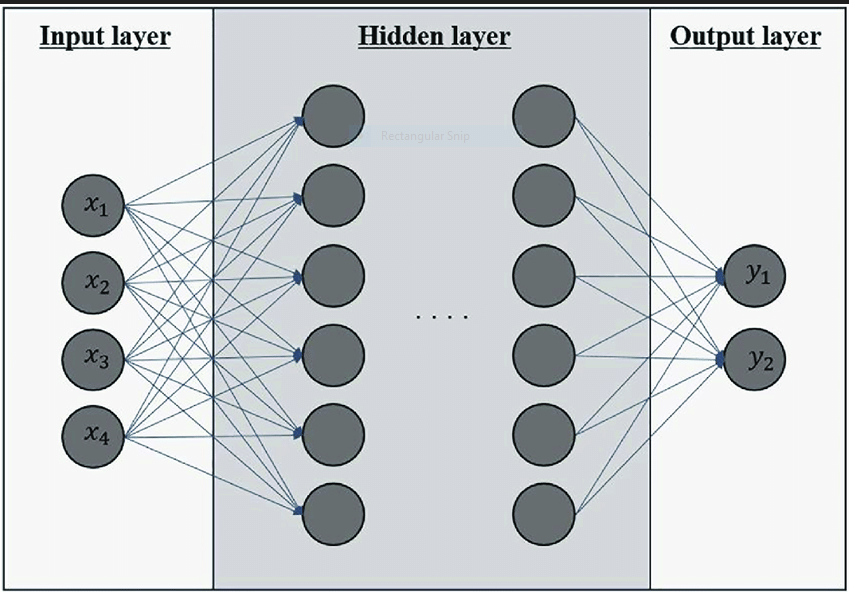

in the view mathematic, we can describe $neural$ $~$ $networks$ as a series of the functional transformations mathematic, these transformations  are the actiovation functions that applied on  combinations linear between inputs and the weights.


the first combinaisons linear is given by:

$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$  $a_{j}=\sum\limits_{i=1}^{D}w_{ji}^{1}x_{i}+w_{jo}^{1}$  $~~~~~~~~~~$ $j \in \{1, ..., D\}$

we applied a activation function $h(.)$ to this we obtain:

$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$ $z_{j}=h(a_{j})$  $~~~~~~~~~~$ $j \in \{1, ..., D\}$

these quantities are called $hidden $$~$$ units$.

we repeat the process we obtain:

$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$  $a_{k}=\sum\limits_{i=1}^{M}w_{ki}^{2}x_{i}+w_{ko}^{2}$  $~~~~~~~~~~$ $k \in \{1, ..., M\}$

we repeat the process till we reach the output layer(the latest layers, or the output of the model).

to make thing more easier, we choose the $sigmoid$ function as the activation function for the output layer , it's giveen by the following expression:

$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$ $\sigma(a)=\dfrac{1}{1+\exp(-a)}$

we can express the output of this perticlar $neural$ $~$ $network$ in function of inputs by the following expression:

$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$ $ y_{k}(X, W)=\sigma(\sum\limits_{j=1}^{M}w_{kj}^{2}h(\sum\limits_{i=1}^{D}w_{ji}^{1}+w_{j0}^{1})+w_{k0}^{2})$

this whole process called $ forward$$~$$propagation$.

this process is just a part of the multiple operations occurs during the training of the $neural$ $~$ $network$.

to make ore easier we set $h(.)=id$

three  crucial arguments need to known before applying the $forward$ $~$ $ propagation$.

$~~~~~~~~~~~~~~~~~~~~$ ==> the number of layers.

$~~~~~~~~~~~~~~~~~~~~$ ==> the number of neurons (units) in each layer(the input layer's number deterind by the size of data and the output layer's number deterined by the task ).

$~~~~~~~~~~~~~~~~~~~~$ ==>the function activations(sigmoid, LeakyRelu, relu, ...etc)






consider the following code:


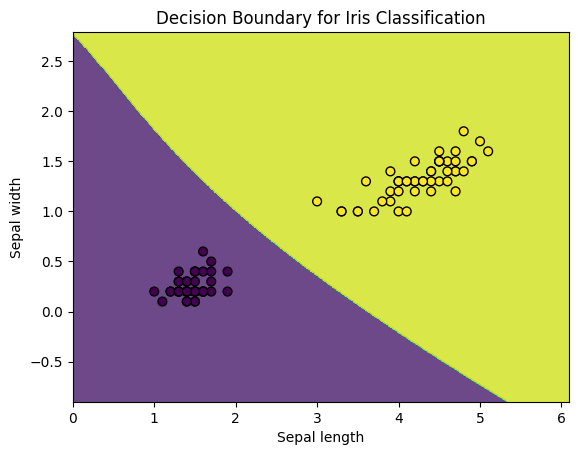

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Fetch iris data
iris = load_iris()
X = iris.data[:100, 2:4] 
# Only use two features and two classes
y = iris.target[:100]


class NeuralNetworks:

    # Define neural network architecture
    def __init__(self, input_dim=None, hidden_units1=10, hidden_units2=10, output_dim=2, learning_rate=.01, EPOCHS=1000):

            '''
               input_dim : is represent the number of samples of data tht feed it to the model
               hidden_units1 : the number of the units(neurons )first hidden lyaer 
               hidden_units2 : the number of the units(neurons )second hidden lyaer 
               out_dim: in the case of the classification it's exactly the number of classes , it may one regression task...etc
            '''
            self.input_dim = X.shape[1]
            self.hidden_units1 = 10
            self.hidden_units2 = 10
            self.output_dim = output_dim
            self.learning_rate = 0.001
            self.EPOCHS = 10000

            # Initialize weights and biases
            np.random.seed(0)
            self.W1 = np.random.randn(self.input_dim, self.hidden_units1)
            self.b1 = np.zeros((1, hidden_units1))
            self.W2 = np.random.randn(self.hidden_units1, self.hidden_units2)
            self.b2 = np.zeros((1, self.hidden_units2))
            self.W3 = np.random.randn(self.hidden_units2, self.output_dim)
            self.b3 = np.zeros((1, self.output_dim))

    # Define sigmoid activation function
    # @staticmethod
    def sigmoid(self, a):
      return 1 / (1 + np.exp(-a))

    def fit(self, X, y):
         def forward():
             # forward propagation =(linea comination + actiovation function(sigmoid) 
             # ==> starting from input layer and ending with the output layer)
             self.z1 = np.dot(X, self.W1) + self.b1
             self.a1 = self.sigmoid(self.z1)
             self.z2 = np.dot(self.a1, self.W2) + self.b2
             self.a2 = self.sigmoid(self.z2)
             self.z3 = np.dot(self.a2, self.W3) + self.b3
             self.a3 = self.sigmoid(self.z3)
    
         def backward():
             # backward propagation =( applied chain formula + updating the weights( SGD algorithm)
             # ==> starting from output layer and ending with the intput layer)
             # Chek out the folowing notebook (network training) for good understanding of the backpropagation algorithm
             # Convert class labels to one-hot encoded vectors
             y_true = np.eye(self.output_dim)[y]
             self.loss = np.sum((self.a3 - y_true) ** 2)/2
             self.dloss_da3 = (self.a3 - y_true) 
             self.da3_dz3 = self.a3 * (1 - self.a3)
             self.dz3_dw3 = self.a2
             self.dz3_db3 = 1
    
             self.dloss_dw3 = np.dot(self.dz3_dw3.T, (self.dloss_da3 * self.da3_dz3))
             self.dloss_db3 = np.sum(self.dloss_da3 * self.da3_dz3, axis=0, keepdims=True)
    
             self.dloss_da2 = np.dot(self.dloss_da3 * self.da3_dz3, self.W3.T)
             self.da2_dz2 = self.a2 * (1 - self.a2)
             self.dz2_dw2 = self.a1
             self.dz2_db2 = 1
    
             self.dloss_dw2 = np.dot(self.dz2_dw2.T, (self.dloss_da2 * self.da2_dz2))
             self.dloss_db2 = np.sum(self.dloss_da2 * self.da2_dz2, axis=0, keepdims=True)
    
             self.dloss_da1 = np.dot(self.dloss_da2 * self.da2_dz2, self.W2.T)
             self.da1_dz1 = self.a1 * (1 - self.a1)
             self.dz1_dw1 = X
             self.dz1_db1 = 1
    
             self.dloss_dw1 = np.dot(self.dz1_dw1.T, (self.dloss_da1 * self.da1_dz1))
             self.dloss_db1 = np.sum(self.dloss_da1 * self.da1_dz1, axis=0, keepdims=True)
         def update_weights():
             # Update weights and biases(SGD algorithm)
             self.W1 -= self.learning_rate * self.dloss_dw1
             self.b1 -= self.learning_rate * self.dloss_db1
             self.W2 -= self.learning_rate * self.dloss_dw2
             self.b2 -= self.learning_rate * self.dloss_db2
             self.W3 -= self.learning_rate * self.dloss_dw3
             self.b3 -= self.learning_rate * self.dloss_db3
             
         # Training loop
         for epoch in range(self.EPOCHS):
                   forward()
                   backward()
                   update_weights()

         return self.W1, self.b1 , self.W2 ,self.b2 , self.W3 , self.b3

if __name__=='__main__':

  # Create the instance
  nn=NeuralNetworks()
  # training the model
  W1, b1 , W2 ,b2 , W3 , b3=nn.fit(X, y)   
  # Plot decision boundary
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

  sigmoid=lambda a:1/(1+np.exp(-a))
  Z = np.dot(sigmoid(np.dot(sigmoid(np.dot(np.c_[xx.ravel(), yy.ravel()], W1) + b1), W2) + b2), W3) + b3
  Z = np.argmax(Z, axis=1)
  Z = Z.reshape(xx.shape)

  plt.contourf(xx, yy, Z, alpha=0.8)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, edgecolors='k')
  plt.xlabel('Sepal length')
  plt.ylabel('Sepal width')
  plt.title('Decision Boundary for Iris Classification')
  plt.show()
  W1, b1 , W2 ,b2 , W3 , b3


## NeuralNetworks:

in general terms, we can define a $neural$ $¬$ $networks$ as the following:

In [ ]:
class NeuralNetworks:
    
    def __init__(self , layers=None, loss=None, optimizer=None, regularization=None, activation=None, earlystopping=None, initialization=None):
        # layers define by their numbers and units (neurons) of each layer and fuction activations
        self.layers=layers
        # loss is error function of each point, it may be 'mse', ..(for resression cases) 
        # or 'BinaryCrossEntropy' (for binary calssifier cases) ...
        self.loss=loss
        # optimizer is the algorithm of the optimization such as 'SGD', 'ADAM'...etc
        # those optimizer has their arguments such as learning rate, momentum(ADAM)...
        self.optimizer=optimizer
        # regularization: is the technique used to prevent to odel to overfit data,
        # usually we have three comon regurilazation techniques l2(||.||2), l1(||.||1) and l1_l2 
        # the usuall arguent of the regularization is paraeter 0f regularization , we set it usually .5
        self.regularization=regularization
        # activation is function is a function that applied in each ouput 
        # of the neurons it is non linear function for calssification cases( sigoid for binary classifier represent a probabilities)
        # and identity for regression cases
        self.activation=activation
        # in real model , their is no prefect model, so the training must stop after some number epochs,
        # or when achieve some satisfied Lossor score( threshold)
        self.earlystopping=earlystopping
        # such as neaural networks is iterative algorithms and we updating the weights, we need to initailize a starting points
        # we can inintialize the weights randomly(most preferable that also a lot versions 'he', ...) or determinstic
        # that can lead a several issues such a symetries issues ...etc
        self.weights=initialization
        
    def fit(self, X, y):
        # for training of neural networks, we  dinstincts usually between two major traing steps
        # the Feed Forward and Feed Backward 
        def forward():
            pass

        def bacward():
            pass

    def predict(self, X):
        # make prediction
        pass

    def evalute(self):
        # model evaluation 
        pass



in the following notebooks, we will explain each concept.